<div>
    <h2> Принятие решений в бизнесе <a class="tocSkip"> </h2>

Описание проекта:
    В 1й части проекта наша задача приоритизировать 9 гипотез по увеличению выручки интернет-магазина
        
    Во второй части проекта будем проанализировать результаты проведенного А/В-тестирования и аргументировать принятые решения. Здесь будут изучены следующие метрики:
        - кумулятивная выручка по группам
        - кумулятивный средний чек по группам
        - относительное изменение кумулятивного среднего чека группы В к группе А
        - кумулятивное среднее количество заказов на посетителя по группам
        - изменение кумулятивного среднего кол-ва заказов на посетителя группы В к группе А
        - определение границ выбросов
        - статистическая значимость различий в среднем чеке заказа между группами по сырым и очищенным данным
        - статистическая значимость различий в среднем кол-ве заказов на посетителя между группами по сырым и очищенным данным
    

In [1]:
#импорт необходимых библиотек и инструментов
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [2]:
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
    
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

<div>
    <h2> Часть первая. Приоритизация гипотез <a class="tocSkip"> </h2>


In [3]:
pd.set_option('display.max_colwidth', None)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [4]:
#корректировка названий столбцов в соответствии с принятыми стандартами
hypothesis.columns = map(str.lower, hypothesis.columns)

In [5]:
#приоритизация гипотезы с применением фрейма ICE и сортировка по убыванию приоритета
hypothesis['ICE'] = round((hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']), 2)
sort_hypothesis_ice = hypothesis.sort_values(by='ICE', ascending=False)
sort_hypothesis_ice

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


наиболее перспективные гипотезы: 
1. Запустить акцию, дающую скидку на товар в день рождения (однако охват этого изменения очень маленький (всего 1), в то же время стоимость этого эксперимента оценена в 5, что достаточно много)
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей (аналогично малый охват)
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
5. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа

Реально перспективными видятся вышеперечисленные гипотезы 3-5

In [6]:
#приоритизация гипотезы с применением фрейма RICE и сортировка по убыванию приоритета
hypothesis['RICE'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']) / hypothesis['efforts']
sort_hypothesis_rice = hypothesis.sort_values(by='RICE', ascending=False)
sort_hypothesis_rice

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Сейчас приоритет гипотез распределился иначе, но выводы предыдущего задания не особо изменились: в топ-4 гипотез вошли те же, что и лидировали при ICE. Так же подтвердилась то, что запустить акцию в честь дня рождения не самая лучшая идея т.к. она охватывает очень малый круг покупателей. 
Лидером стала гипотеза:

    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок	


<div>
    <h2> Часть вторая. Анализ результатов проведенного А/В-тестирования <a class="tocSkip"> </h2>

In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
# приведение столбца date к типу datetime
orders['date'] = pd.to_datetime(orders['date'])

#корректировка названий столбцов в соответствии с принятыми стандартами
orders.columns = map(str.lower, orders.columns)
orders = orders.rename(columns={'transactionid' : 'transaction_id', 'visitorid':'visitor_id'})
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [9]:
#проверка наличия пропусков
print(orders.isna().sum()) 

transaction_id    0
visitor_id        0
date              0
revenue           0
group             0
dtype: int64


In [10]:
orders.duplicated().sum() #проверка наличия дубликатов

0

In [11]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [12]:
# приведение столбца date к типу datetime
visitors['date'] = pd.to_datetime(visitors['date'])
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [13]:
#проверка наличия пропусков
print(visitors.isna().sum()) 

date        0
group       0
visitors    0
dtype: int64


In [14]:
visitors.duplicated().sum() #проверка наличия дубликатов

0

Дубликатов и пропусков в датафреймах не обнаружено. Столбцы приведены к соответствующему регистру. 

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>1. Построение графика куммулятивной выручки по группам</b>

In [15]:
# создание массива уникальных пар значений дат и групп теста

dates_groups = orders[['date', 'group']].drop_duplicates()

In [16]:
# получаем агрегированные кумулятивные по дням данные о заказах 

orders_aggregated = dates_groups.apply (
    lambda x: orders [np.logical_and (orders ['date'] <= x ['date'], orders ['group'] == x ['group'])]\
.agg( {'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', 'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1
).sort_values (by=['date', 'group'])


In [17]:
# получаем агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]\
    .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [18]:
# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulative_data.head(10))


        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845
5 2019-08-03     B      61      59   380996      1803
6 2019-08-04     A      84      77   425699      2562
7 2019-08-04     B      78      75   489567      2573
8 2019-08-05     A     109     100   549917      3318
9 2019-08-05     B     101      98   581995      3280


In [19]:
# создаем датафреймы с кумулятивным кол-вом заказов по дням в группах А и В
cumulative_revenue_A = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]
cumulative_revenue_B = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

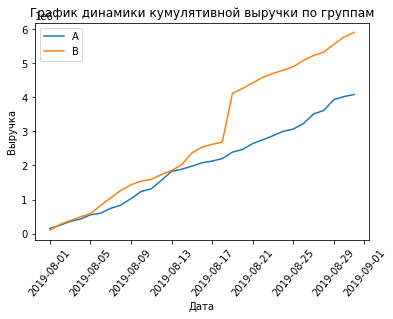

In [20]:
# Строим график выручки 
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue'], label='B')
plt.title('График динамики кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xlabel("Дата")
plt.xticks(rotation=50)
plt.legend()
plt.show()

Выручка почти равномерно увеличивается в течение всего теста, однако в группе В в середине теста произошел рост заказов. Это может свидетельствовать об увеличении числа заказов или о том, что в заказах были очень дорогие позиции. 

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>2. Построение графика кумулятивного среднего чека по группам</b>

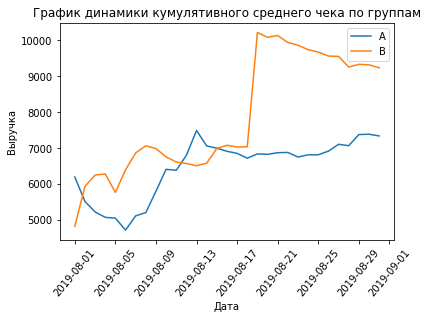

In [21]:
plt.plot(cumulative_revenue_A['date'], cumulative_revenue_A['revenue']/cumulative_revenue_A['orders'], label='A')
plt.plot(cumulative_revenue_B['date'], cumulative_revenue_B['revenue']/cumulative_revenue_B['orders'], label='B')
plt.title('График динамики кумулятивного среднего чека по группам')
plt.ylabel("Выручка")
plt.xlabel("Дата")
plt.xticks(rotation=50)
plt.legend()
plt.show()

средний чек стал стабильным ближе к концу теста для группы А. И после подъема стал снижаться для группы В, однако уровень среднего чека все равно остался гораздо выше группы А

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>3. Построение графика относительного изменения кумулятивного среднего чека группы В к группе А</b>

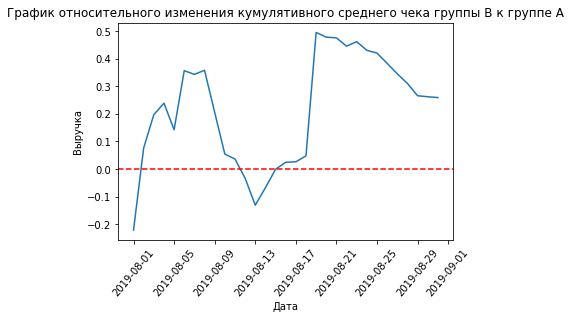

In [22]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_A.merge(cumulative_revenue_B, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenueB']/merged_cumulative_revenue['ordersB'])/(merged_cumulative_revenue['revenueA']/merged_cumulative_revenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.ylabel("Выручка")
plt.xlabel("Дата")
plt.xticks(rotation=50)
plt.show()

Результаты теста значительно менялись в несколько дат. Возможно тогда были аномальные заказы

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b>4. Построение графика кумулятивного среднего количества заказов на посетителя по группам.</b>

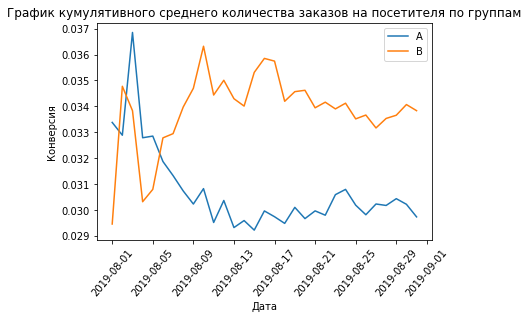

In [23]:
# определение кумулятивной конверсии
cumulative_data['conversion'] = cumulative_data['orders'] / cumulative_data['visitors']

#Определение данных по группам
cumulative_data_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_B = cumulative_data[cumulative_data['group'] == 'B']

#построение графиков
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label= 'A')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label= 'B')
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.ylabel("Конверсия")
plt.xlabel("Дата")
plt.xticks(rotation=50)
plt.legend()
plt.show()

в начале эксперимента группы колебались симметрично, но потом конверсия группы А просела, а конверсия группы В наоборот, выросла 

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b> 5. Построение графика относительного изменения кумулятивного среднего кол-ва заказов на посетителя группы В к группе А.</b>

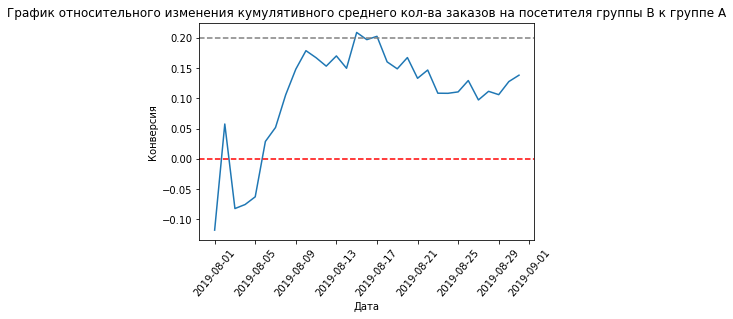

In [24]:
merged_сumulative_сonversions = cumulative_data_A[['date','conversion']].merge(cumulative_data_B[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.plot(merged_сumulative_сonversions['date'], merged_сumulative_сonversions['conversionB']/merged_сumulative_сonversions['conversionA']-1, label="Относительный прирост конверсии группы B к группе A")

plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего кол-ва заказов на посетителя группы В к группе А')
plt.ylabel("Конверсия")
plt.xlabel("Дата")
plt.xticks(rotation=50)
plt.show()

Уже в начале теста группа В лидирует по конверсии и даже в середине теста достигла прироста 20% относительно группы а, однако потом началось снижение. Но все равно конверсия находится к концу теста в промежутке 10-15% прироста

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b> 6. Построение точечного графика количества заказов по пользователям</b>

In [25]:
#Посчитаем кол-во заказов по пользователям
orders_by_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id' : 'nunique'})
orders_by_users.columns = ['user_id', 'orders']
display(orders_by_users.sort_values(by='orders', ascending=False))

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
...,...,...
359,1484903144,1
360,1485964287,1
361,1494664757,1
362,1495112755,1


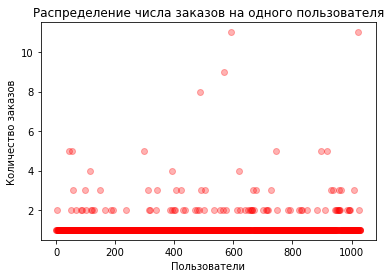

In [26]:
#Построим точечную диаграмму числа заказов на одного пользователя
x_values = pd.Series(range(0, len(orders_by_users)))
plt.scatter(x_values, orders_by_users['orders'], color='red', alpha = 0.3)
plt.title('Распределение числа заказов на одного пользователя')
plt.ylabel("Количество заказов")
plt.xlabel("Пользователи")
plt.show()

Много пользователей с 2-4 заказами. Однако их точная доля не ясна - не понятно, можно ли их считать аномалиями или нет. Поэтому посчитаем выборочные перцентили кол-ва заказов на 1 пользователя:

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b> 7. Расчет 95-го и 99-го перцентилей кол-ва заказов на пользователя. Выбор границы для определения аномальных пользователей</b>

In [27]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[2. 4.]


не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более 4 раз. Разумно выбрать 2-3 заказа на одного пользователя за верхнюю границу числа заказов и отсеивать аномальных пользователей по ней.

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b> 8. Построение точечного графика стоимости заказов</b>

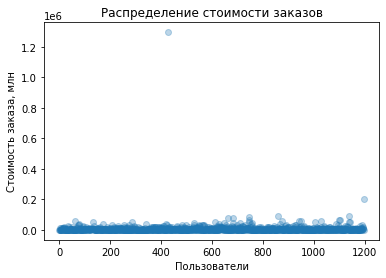

In [28]:
# оценим стоимость заказов
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], alpha = 0.3)
plt.title('Распределение стоимости заказов')
plt.ylabel("Стоимость заказа, млн")
plt.xlabel("Пользователи")
plt.show()

In [29]:
pd.options.display.float_format ='{:,.3f}'.format
orders['revenue'].describe()

count       1,197.000
mean        8,348.006
std        39,191.132
min            50.000
25%         1,220.000
50%         2,978.000
75%         8,290.000
max     1,294,500.000
Name: revenue, dtype: float64

Как и предполагалось есть несколько дорогих заказов

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b> 9. Расчет 95-го и 99-го перцентилей стоимости заказов</b>

In [30]:
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


Не более 5% заказов дороже 28 000 и не более 1% дороже 58 233,2

были выявлены аномальные значения: для количества покупок - меньше 4х, для стоимости заказа - 58 233,20 и более;

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b> 10. Расчет статистической значимости различий в среднем кол-ве заказов на посетителя между группами по "сырым" данным</b>

В предыдущих расчетах выяснили что в данных есть выбросы, нашли границу для их определения. В данном разделе посчитаем статистическую значимость различий в среднем кол-ве заказов на пользователя между группами по сырым данным - без удаления аномальных пользователей.

Н0 = различий в среднем количестве заказов между группами нет
Н1 = различия в среднем количестве заказов между группами есть

Подготовим таблицу для расчетов:

In [31]:
#переменная с количеством пользователей до выбранной даты включительно в группе A
visitors_daily_a = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitors_daily_a.columns = ['date', 'visitors_per_date_a']

visitors_cummulative_a = visitors_daily_a.apply(
    lambda x: visitors_daily_a[visitors_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_a': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_a.columns = ['date', 'visitors_cummulative_a']

#переменная с количеством пользователей до выбранной даты включительно в группе B
visitors_daily_b = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitors_daily_b.columns = ['date', 'visitors_per_date_b']

visitors_cummulative_b = visitors_daily_b.apply(
    lambda x: visitors_daily_b[visitors_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'visitors_per_date_b': 'sum'}
    ),
    axis=1,
)
visitors_cummulative_b.columns = ['date', 'visitors_cummulative_b']

#переменная с количеством заказов по датам в группе А
orders_daily_a = (
    orders[orders['group'] == 'A'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_a.columns = ['date', 'orders_daily_a', 'revenue_per_date_a']

#переменная с количеством заказов до выбранной даты включительно в группе A
orders_cummulative_a = orders_daily_a.apply(
    lambda x: orders_daily_a[orders_daily_a['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_a': 'sum', 'revenue_per_date_a': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_a.columns = ['date','orders_cummulative_a','revenue_cummulative_a']

#переменная с количеством заказов по датам в группе В
orders_daily_b = (
    orders[orders['group'] == 'B'][['date', 'transaction_id', 'visitor_id', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transaction_id': pd.Series.nunique, 'revenue': 'sum'})
)
orders_daily_b.columns = ['date', 'orders_daily_b', 'revenue_per_date_b']

#переменная с количеством заказов до выбранной даты включительно в группе В
orders_cummulative_b = orders_daily_b.apply(
    lambda x: orders_daily_b[orders_daily_b['date'] <= x['date']].agg(
        {'date': 'max', 'orders_daily_b': 'sum', 'revenue_per_date_b': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])

orders_cummulative_b.columns = ['date','orders_cummulative_b','revenue_cummulative_b']


data = (
    orders_daily_a.merge(
        orders_daily_b, left_on='date', right_on='date', how='left'
    )
    .merge(orders_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(orders_cummulative_b, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_a, left_on='date', right_on='date', how='left')
    .merge(visitors_daily_b, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_a, left_on='date', right_on='date', how='left')
    .merge(visitors_cummulative_b, left_on='date', right_on='date', how='left')
)

data.head(6)

,date,orders_daily_a,revenue_per_date_a,orders_daily_b,revenue_per_date_b,orders_cummulative_a,revenue_cummulative_a,orders_cummulative_b,revenue_cummulative_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280
5,2019-08-06,18,48484,28,242342,127,598401,129,824337,667,655,3985,3935


In [32]:
#переменные orders_by_users_a и orders_by_users_b
orders_by_users_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_a.columns = ['visitor_id', 'orders']

orders_by_users_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_by_users_b.columns = ['visitor_id', 'orders']

Объявим переменные sample_a и sample_b, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. Это нужно, чтобы подготовить выборки к проверке критерием Манна-Уитни.

In [33]:
sample_a = pd.concat([orders_by_users_a['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(data['visitors_per_date_a'].sum() - 
                                          len(orders_by_users_a['orders'])), 
                          name='orders')],axis=0
                    )

sample_b = pd.concat([orders_by_users_b['orders'],
                      pd.Series(
                          0, 
                          index=np.arange(data['visitors_per_date_b'].sum() - 
                                          len(orders_by_users_b['orders'])), 
                          name='orders')],axis=0
                    )

In [34]:
# Функция для проверки гипотезы о равенстве групп data A и data B
def stat_hyp (data_a, data_b):
    alpha = 0.05
    p_value = stats.mannwhitneyu(data_a, data_b)[1]
    print("P-value: {0:.3f}".format(p_value))

    if (p_value < alpha):
        print("Отвергаем нулевую гипотезу: между группами есть разница")
    else:
        print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными")
    
    print("Относительный прирост В к А: {0:.3%}".format(data_b.mean() / data_a.mean()-1))

In [35]:
stat_hyp (sample_a, sample_b)

P-value: 0.017
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 13.808%


по неочищенным данным между группами есть различия. Относительный проигрыш группы А равен 13,8%

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b> 11. Статистическая значимость различий в среднем чеке заказа между группами по сырым данным</b>

In [36]:
stat_hyp(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

P-value: 0.729
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: 25.871%


P-value больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Но средний чек группы B  выше среднего чека группы A на 25.87%

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b> 12. Расчет статистической значимости различий в среднем кол-ве заказов на посетителя между группами по "очищенным" данным</b>

In [37]:
#сначала посчитаем аномальных пользователей
max_count_orders = np.percentile(orders_by_users['orders'], 99)
most_expensive_orders = np.percentile(orders['revenue'], 99)


many_orders_us = pd.concat(
    [
        orders_by_users_a[orders_by_users_a['orders'] > max_count_orders]['visitor_id'],
        orders_by_users_b[orders_by_users_b['orders'] > max_count_orders]['visitor_id'],
    ],
    axis=0,
)


expensive_orders_us = orders[orders['revenue'] > most_expensive_orders]['visitor_id']


abnormal_users = (
    pd.concat([many_orders_us, expensive_orders_us], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Всего аномальных пользователей:', abnormal_users.shape[0])

Всего аномальных пользователей: 15


In [38]:
sample_a_filtered = pd.concat(
    [
        orders_by_users_a[
            np.logical_not(orders_by_users_a['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_a'].sum() - len(orders_by_users_a['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sample_b_filtered = pd.concat(
    [
        orders_by_users_b[
            np.logical_not(orders_by_users_b['visitor_id'].isin(abnormal_users))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitors_per_date_b'].sum() - len(orders_by_users_b['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

stat_hyp(sample_a_filtered, sample_b_filtered)

P-value: 0.014
Отвергаем нулевую гипотезу: между группами есть разница
Относительный прирост В к А: 15.331%


в очищенных данных напротив, разница между группами есть. относительный прирост группы В к группе А тоже вырос

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b> 13. Статистическая значимость различий в среднем чеке заказа между группами по очищенным данным</b>

In [39]:
stat_hyp(
    orders[(orders['group']=='A') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue'], 
    orders[(orders['group']=='B') & np.logical_not(orders['visitor_id'].isin(abnormal_users))]['revenue']
                  )

P-value: 0.851
Не получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными
Относительный прирост В к А: -0.575%


Относительный прирост группы В к группе А после удаления выбросов составил -0.575%

<div class="alert alert" style="border-radius: 10px; box-shadow: 2px 2px 2px; border: 1px solid; padding: 10px "> 
<b> 14. Результаты теста и выводы</b>

1. В первой части исследования были рассмотрены 9 гипотез по увеличению выручки в интернет-магазине с помощью способа приоритизации задач ICE/RICE. По итогам этого исследования выявлено, что  стоит обратить внимание на следующие гипотезы:

    - Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
    - Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа;
    - Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
    - Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию;
    - Запустить акцию, дающую скидку на товар в день рождения

Данные гипотезы отсортированы по убыванию значимости по показателю RICE, который учитывает охват аудитории. Таким образом акция, дающая скидку на товар в день рождения попала в эту выборку, но на последнее место. Она имеет высокие показатели Impact и confidence, но охватывает очень малое количество аудитории.

2. Во второй части был проведен анализ результатов А/В теста и получены следующие результаты:

    - при построении графика куммулятивной выручки по группам был обнаружен резкий рост выручки в группе В в середине теста. Сформировано предположение что на этот рост могли повлиять "выбросы";
    - при построении графика кумулятивного среднего чека по группам, в группе В так же уровень среднего чека выше;
    - при построении графика относительного изменения кумулятивного среднего чека группы В к группе А были выявлены несколько всплесков, которые могут свидетельствовать о наличии аномально высоких заказов;
    - при построении графика кумулятивного среднего количества заказов на посетителя по группам, то в начале эксперимента группы колебались симметрично, но потом конверсия группы А просела, а конверсия группы В наоборот, выросла;
    - при построении графика относительного изменения кумулятивного среднего кол-ва заказов на посетителя группы В к группе А. Уже в начале теста группа В лидирует по конверсии, в середине теста достигла прироста 20% относительно группы А, однако потом началось снижение. Но все равно конверсия находится к концу теста в промежутке 10-15% прироста.
    - были выявлены аномальные значения: для количества покупок - меньше 4х, для стоимости заказа - 58 233,20 и более;
    - для расчета статистической значимости различий в среднем кол-ве заказов на посетителя между группами данным сформулированы гипотезы 
    
            Н0 = различий в среднем количестве заказов между группами нет 
            Н1 = различия в среднем количестве заказов между группами есть
            
    - При расчете статистической значимости различий в среднем кол-ве заказов на посетителя между группами по "сырым" и "очищенным" данным было выявлено: P-value в обоих случаях меньше 0,05, в связи с чем мы отвергаем нулевую гипотезу: между группами есть разница. И относительный прирост группы В к группе А составил 13.808% в случае с "сырыми" данными и 15.331% в случае с "очищенными";
    
    - При расчете статистической значимости различий в среднем чеке заказа между группами по "сырым" и "очищенным" данным было выявлено: P-value в обоих случаях больше установленного предельного значения, в связи с чем е получилось отвергнуть нулевую гипотезу, нет оснований считать группы разными. Относительный прирост группы В к группе А после удаления выбросов составил -0.575%;
    
    ВЫВОД:
    Результаты группы В стабильно лучше результатов группы А, статитстической значимости различий по среднему чеку между группами не выявлено, однако есть ощутимый рост конверсии в группе В. На основании вышеизложенного рекомендуется остановить тест, зафиксировав победу группы B
